In [7]:
# Étape 1 : Lecture et exploration du dataset Titanic

# Importer la bibliothèque pandas pour manipuler les données
import pandas as pd

# Lire le fichier CSV 'Titanic-Dataset.csv' et le stocker dans un DataFrame
data = pd.read_csv('Titanic-Dataset.csv')

# Afficher les 5 premières lignes du dataset pour avoir un aperçu des données
print(data.head())

# Afficher des informations générales sur le dataset :
# - nombre de lignes et de colonnes
# - noms et types de colonnes
# - nombre de valeurs non nulles par colonne
print(data.info())

# Vérifier s'il y a des valeurs manquantes (NaN) dans chaque colonne
# Cela aide à identifier les colonnes à nettoyer ou à compléter
print(data.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [9]:
# Étape 2 : Sélection et nettoyage des colonnes importantes

# Sélectionner uniquement les colonnes pertinentes pour la prédiction
# 'Survived' → variable cible (1 = survécu, 0 = décédé)
# 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' → variables explicatives
data = data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

# Remplacer les valeurs manquantes dans la colonne 'Age' par la médiane des âges
# Cela évite de supprimer des lignes et réduit l'impact des valeurs extrêmes
data['Age'] = data['Age'].fillna(data['Age'].median())

# Remplacer les valeurs manquantes dans la colonne 'Embarked' par la valeur la plus fréquente (mode)
# La plupart des passagers ont embarqué depuis le port le plus courant
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
# Étape 3 : Encodage des variables catégorielles

# Importer LabelEncoder pour convertir les catégories en nombres
from sklearn.preprocessing import LabelEncoder

# Créer un objet LabelEncoder
le = LabelEncoder()

# Transformer la colonne 'Sex' (male/female) en valeurs numériques
# male → 1, female → 0 (ou inverse selon l'encodage)
data['Sex'] = le.fit_transform(data['Sex'])

# Transformer la colonne 'Embarked' (port d'embarquement : C, Q, S) en valeurs numériques
# Chaque port devient un entier unique : C → 0, Q → 1, S → 2 (exemple)
data['Embarked'] = le.fit_transform(data['Embarked'])

In [13]:
# Étape 4 : Séparer les variables explicatives et la variable cible

# X → toutes les colonnes sauf 'Survived' (features)
X = data.drop('Survived', axis=1)

# y → colonne 'Survived' (target) que le modèle doit prédire
y = data['Survived']

# Importer la fonction pour diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Diviser les données :
# - 80% pour l'entraînement
# - 20% pour les tests
# random_state=42 permet de reproduire exactement la même division à chaque exécution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Étape 5 : Création et entraînement des modèles de classification

# Importer les modèles :
# - LogisticRegression : modèle de régression logistique (classification binaire)
# - RandomForestClassifier : modèle de forêt aléatoire pour la classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Créer un objet LogisticRegression
# max_iter=1000 → nombre maximum d'itérations pour assurer la convergence
log_model = LogisticRegression(max_iter=1000)

# Créer un objet RandomForestClassifier
# n_estimators=100 → nombre d'arbres dans la forêt
# random_state=42 → pour rendre les résultats reproductibles
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle de régression logistique sur les données d'entraînement
log_model.fit(X_train, y_train)

# Entraîner le modèle Random Forest sur les mêmes données
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
# Étape 6 : Évaluation des modèles de classification

# Importer les métriques pour évaluer la performance des modèles
from sklearn.metrics import accuracy_score, classification_report

# Faire des prédictions sur le jeu de test avec le modèle de régression logistique
y_pred_log = log_model.predict(X_test)

# Faire des prédictions sur le jeu de test avec le modèle Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculer et afficher l'accuracy (taux de bonnes prédictions) du modèle logistique
print('Accuracy (Logistic):', accuracy_score(y_test, y_pred_log))

# Calculer et afficher l'accuracy du modèle Random Forest
print('Accuracy (Random Forest):', accuracy_score(y_test, y_pred_rf))

# Afficher un rapport détaillé pour le modèle Random Forest
# Comprend : précision, rappel, f1-score et support pour chaque classe
print(classification_report(y_test, y_pred_rf))

Accuracy (Logistic): 0.8100558659217877
Accuracy (Random Forest): 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



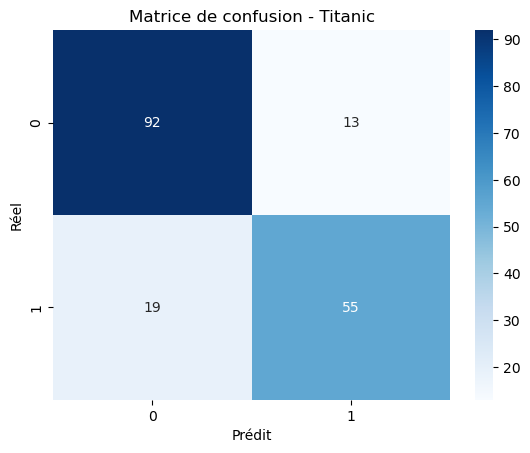

In [19]:
# Étape 7 : Visualisation de la matrice de confusion pour le modèle Random Forest

# Importer la fonction confusion_matrix pour calculer la matrice de confusion
from sklearn.metrics import confusion_matrix

# Importer seaborn pour visualiser la matrice sous forme de heatmap
import seaborn as sns

# Importer matplotlib pour l'affichage du graphique
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
# cm[i,j] = nombre d'exemples dont la vraie classe est i et la classe prédite est j
cm = confusion_matrix(y_test, y_pred_rf)

# Créer une heatmap pour visualiser la matrice
# annot=True → afficher les nombres dans les cases
# fmt='d' → format entier
# cmap='Blues' → couleurs dégradées en bleu
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Ajouter un titre au graphique
plt.title('Matrice de confusion - Titanic')

# Ajouter le label pour l'axe x (classes prédites)
plt.xlabel('Prédit')

# Ajouter le label pour l'axe y (classes réelles)
plt.ylabel('Réel')

# Afficher le graphique
plt.show()